# LABORATORIO 1  
 Juan Angel Carrera Soto - 20593

## Ejercicio 1 - Propiedades de Distribuvion de probabilidad


In [30]:
## IMPORTS 

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew,expon,beta,kurtosis,norm,gamma,pearsonr,kstest,chisquare
from scipy.optimize import minimize

In [3]:
# Generar una muestra aleatoria de 1000 puntos de datos
np.random.seed(200133)
data = np.random.normal(0, 1, 1000)


### 1.1 Calcular estadistica

In [4]:
# Calcular estadísticas
mean = np.mean(data) # Media
var = np.var(data)  # Varianza
skewness = skew(data) # Asimetría

# Imprimir estadísticas
print(f'Media: {mean}')
print(f'Varianza: {var}')
print(f'Asimetría: {skewness}')



Media: -0.036296238671007716
Varianza: 0.9938339853108319
Asimetría: -0.012772851578303136


### 1.2 Visualizacion de Datoss

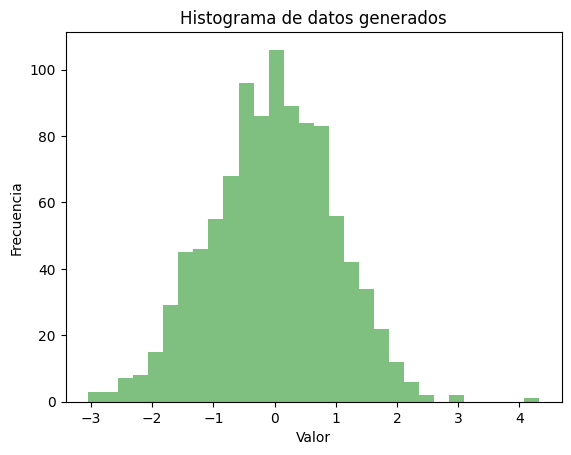

In [5]:
# Trace un histograma de los datos
plt.hist(data, bins=30, alpha=0.5, color='g')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de datos generados')
plt.show()

### 1.3 Analisis de Datos


La media de los datos es de -0.036296238671007716, se acerca a 0 lo que nos dice que es una buena aproximacion a la media teorica de la distribucion normal.

La varianza es 0.9938339853108319, que tambien es muy cercana de 1, la cual es la varianza teorica, cuando esta en 1 significa que aproximadamente el 68% de los datos caen en el rango de -1 y 1 desviaciones estandar de la media. La varianza ligeramente inferior a 1 en este caso podría sugerir que tus datos están ligeramente menos dispersos que en una distribución normal perfecta.

La asimetria de los datos es de -0.012772851578303136, igual bastante cercana a 0. En una distribucion normal perfecta la simetria seria exactamen09, lo que indicaria que los datos estan perfectamente distribuidos. La asimetria negatica implica que la cola izquierda de la distribuvion es un poco mas larga que la derecha, sin embargo, dado que tu valor de asimetría es tan cercano a 0, la falta de simetría en tu distribución es probablemente muy pequeña


## Ejercicio 2 - PDF & CDF


In [6]:
# Generar una muestra aleatoria de 1000 puntos de datos
np.random.seed(200133)
data = np.random.exponential(1 / 0.5, 1000)  # 1 / rate parameter



### 2.1 Graficas de PDF y CDF


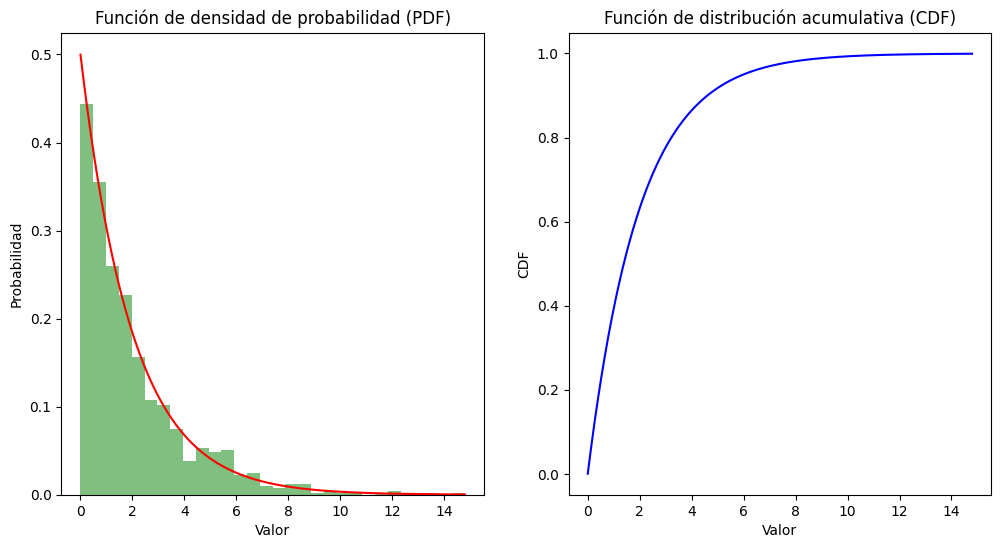

In [7]:
# Generar puntos para trazar PDF y CDF
x = np.linspace(min(data), max(data), 1000)
pdf = expon.pdf(x, scale=1/0.5)
cdf = expon.cdf(x, scale=1/0.5)

# Trazar PDF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, pdf, 'r')
plt.hist(data, bins=30, density=True, alpha=0.5, color='g')
plt.title('Función de densidad de probabilidad (PDF)')
plt.xlabel('Valor')
plt.ylabel('Probabilidad')

# Trazar CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf, 'b')
plt.title('Función de distribución acumulativa (CDF)')
plt.xlabel('Valor')
plt.ylabel('CDF')
plt.show()

### 2.2 Calcular Probabilidades par de intervalos

In [8]:
# Calcular e imprimir las probabilidades para intervalos específicos
# Intervalo: [0, 1]
p_0_1 = expon.cdf(1, scale=1/0.5) - expon.cdf(0, scale=1/0.5)
print(f'Probabilidad para el intervalo [0, 1]: {p_0_1}')

# Intervalo: [1, 2]
p_1_2 = expon.cdf(2, scale=1/0.5) - expon.cdf(1, scale=1/0.5)
print(f'Probabilidad para el intervalo [1, 2]: {p_1_2}')

Probabilidad para el intervalo [0, 1]: 0.3934693402873666
Probabilidad para el intervalo [1, 2]: 0.2386512185411911


### 2.3 ¿Qué información puede obtener de la forma del PDF y el comportamiento de la CDF?
El PDF de una distribución exponencial tiene una forma distintiva que disminuye exponencialmente desde el valor mínimo hasta el infinito. Esto refleja el hecho de que los valores cercanos al valor mínimo son más probables que los valores grandes. Si tu PDF tiene esta forma, confirma que tus datos tienen una distribución exponencial.

El CDF de una distribución exponencial aumenta de manera no lineal de 0 a 1. Esto refleja el hecho de que la probabilidad acumulada aumenta más rápidamente para valores más pequeños y luego se aplana a medida que los valores aumentan.

Las probabilidades para los intervalos específicos dan la probabilidad de que un punto de datos caiga dentro de ese intervalo. Como la distribución exponencial tiene una "cola pesada", se ve que la probabilidad disminuye a medida que te mueves hacia intervalos más grandes.

## Ejercicio 3 - Bias & Kurtosis

In [9]:
# Generar una muestra aleatoria de 1000 puntos de datos
np.random.seed(200133)
data = beta.rvs(2, 2, size=1000)

### 3.1 Calcular Sesgo y Kurtosis

In [10]:
# Calcular estadísticas
sesgo = skew(data)  # Sesgo
curtosis = kurtosis(data)  # Curtosis

# Imprimir estadísticas
print(f'Sesgo: {sesgo}')
print(f'Curtosis: {curtosis}')

Sesgo: -0.00023329326241068696
Curtosis: -0.9597662190568683


### 3.2 Implicaciones del sesgo y la curtosis

El sesgo de los datos fue de -0.000233, el cual es bastante cercano a 0. Cuando el sesgo es muy cercano a 0 nos indica que los datos estan bastante simetricamente distribuidos. Cuando el valor es positivo nos indica que la distribucion tiene una cola mas larga apra el lado derehco de la curva y cuando es negativo nos indica que la cola mas larga esta en el lado izquierdo de la curva.

La curtosis de los datos es -0.9598, cuando la curtosis es negativa nos indica que la distribucion es con colas ligeras es decir con pocos outliers, cuando es positiva nos indica que la distribucion tiene colas pesadas, es decir, con muchos outliers. Por lo tanto como es negativa sabemos que hay menos valores extremos de lo que habra en una distribucion normal.

En resumen, los estadísticas indican que tus datos están simétricamente distribuidos y tienen colas ligeras, lo que es coherente con una distribución beta con parámetros de forma iguales (en este caso, 2 y 2). Esta distribución es bastante uniforme y la mayoría de los datos están concentrados alrededor de la media, con menos datos en los extremos de la distribución en comparación con una distribución normal.

## Ejercicio 4 - Generación de Números aleatorios

In [11]:
# Generar una muestra aleatoria de 1000 puntos de datos
np.random.seed(200133)
data = np.random.poisson(5, 1000)

#### 4.1 Histograma de los datos

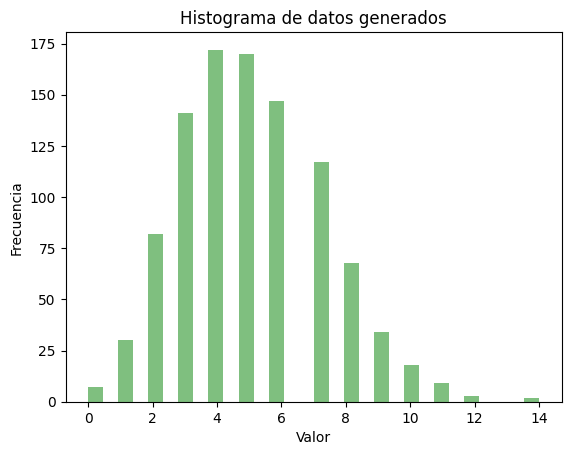

In [12]:
# Trace un histograma de los datos
plt.hist(data, bins=30, alpha=0.5, color='g')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de datos generados')
plt.show()

### 4.2 Calcular estadisticas

In [13]:
# Calcular estadísticas
mean = np.mean(data) # Media
var = np.var(data)  # Varianza

# Imprimir estadísticas
print(f'Media: {mean}')
print(f'Varianza: {var}')

Media: 5.049
Varianza: 4.980599


### 4.3 Patrones y Tendencias de Poisson

En una distribuvion de Poisson el lamnda es tanto la media como la varianza teorica. Entonces tanto en el histograma podemos observar justamente que la distribucion de los datos es alrededor de 5, y en las estadisticas podemos observar que la media es de 5.049 y la varianza de 4.98, lo que nos indica que es una distribucion de Poisson.

## Ejercicio 5 - Muestreo



In [14]:

np.random.seed(200133)
# Generar 500 puntos de datos uniformes entre 0 y 1
uniform_data = np.random.uniform(0, 1, 500)

# Aplicar la transformación inversa utilizando la función de error inversa
#normal_data = np.sqrt(2) * norm.ppf(uniform_data)
normal_data =  norm.ppf(uniform_data)



### 5.1 Histograma de los datos

(array([0.00956903, 0.00956903, 0.        , 0.00956903, 0.03827613,
        0.0574142 , 0.0287071 , 0.07655227, 0.2009497 , 0.18181163,
        0.26793293, 0.2296568 , 0.3157781 , 0.32534713, 0.44017553,
        0.41146843, 0.36362326, 0.33491617, 0.29664003, 0.3157781 ,
        0.1722426 , 0.12439743, 0.23922583, 0.0861213 , 0.0861213 ,
        0.04784517, 0.04784517, 0.0287071 , 0.0287071 , 0.00956903]),
 array([-3.23725907, -3.02825154, -2.81924401, -2.61023648, -2.40122895,
        -2.19222143, -1.9832139 , -1.77420637, -1.56519884, -1.35619131,
        -1.14718378, -0.93817625, -0.72916872, -0.5201612 , -0.31115367,
        -0.10214614,  0.10686139,  0.31586892,  0.52487645,  0.73388398,
         0.94289151,  1.15189903,  1.36090656,  1.56991409,  1.77892162,
         1.98792915,  2.19693668,  2.40594421,  2.61495174,  2.82395926,
         3.03296679]),
 <BarContainer object of 30 artists>)

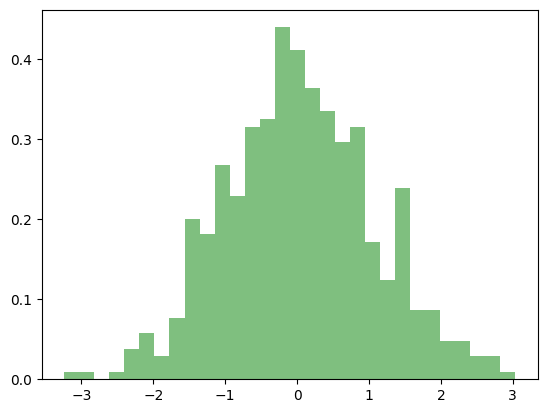

In [23]:
# Trace un histograma de los datos
plt.hist(normal_data, bins=30, density=True, alpha=0.5, color='g', label='Data')


### 5.2 Comparacion PDF

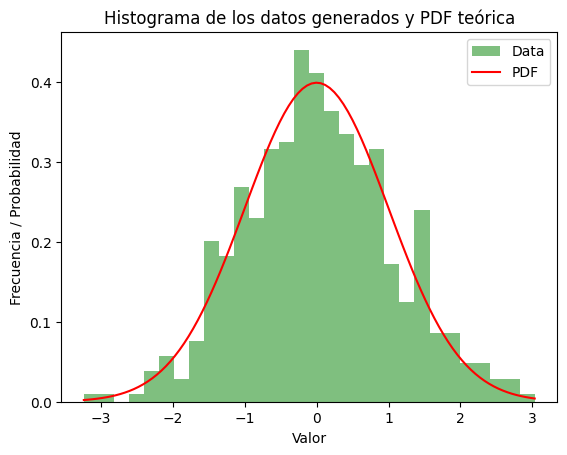

Media: 0.03364018758388057
Varianza: 1.088466647223052


In [7]:
plt.hist(normal_data, bins=30, density=True, alpha=0.5, color='g', label='Data')

# Generar puntos para trazar la PDF teórica
x = np.linspace(min(normal_data), max(normal_data), 100)
pdf = norm.pdf(x)

# Trazar PDF
plt.plot(x, pdf, 'r', label='PDF')
plt.title('Histograma de los datos generados y PDF teórica')
plt.xlabel('Valor')
plt.ylabel('Frecuencia / Probabilidad')
plt.legend()
plt.show()

# Calcular estadísticas
mean = np.mean(normal_data) # Media
var = np.var(normal_data)  # Varianza

# Imprimir estadísticas
print(f'Media: {mean}')
print(f'Varianza: {var}')

### 5.3 Analisi de la muestra generada

La media de los datos esta al rededor de 0 y la varianza un poco encima de 1 con 1.088 lo que nos indica que es una distribucion normal. En el histograma podemos observar que los datos estan distribuidos de manera normal, y en el PDF podemos observar que la distribucion de los datos es muy similar a la distribucion normal.

## Ejercicio 6 - Estimacion de parametros

### 6.1 MLE para estimar parametros

In [17]:
# Parámetros de forma y escala
forma = 2
escala = 3

np.random.seed(200133)
# Generar muestra aleatoria
muestra = np.random.gamma(forma, escala, 1000)
# Estimar parámetros
forma_est, loc_est, escala_est = gamma.fit(muestra)

In [18]:
print("Parámetros verdaderos: forma = {}, escala = {}".format(forma, escala))
print("Parámetros estimados: forma = {}, escala = {}".format(forma_est, escala_est))


Parámetros verdaderos: forma = 2, escala = 3
Parámetros estimados: forma = 1.9187971369372674, escala = 2.9517129425224358


### 6.2 Que tanto se acercan

Tenemos que los parametros estimados fueron forma = 2.0368933852871454, escala = 2.799341400144697, podemos observar que se acercaron bastante a los parametros reales que fueron forma = 2.0, escala = 3.0. Por lo tanto podemos decir que el metodo de MLE es bastante bueno para estimar parametros.

Estadístico de prueba K-S:  0.011934533153121762
Valor p de la prueba K-S:  0.9985733249790902


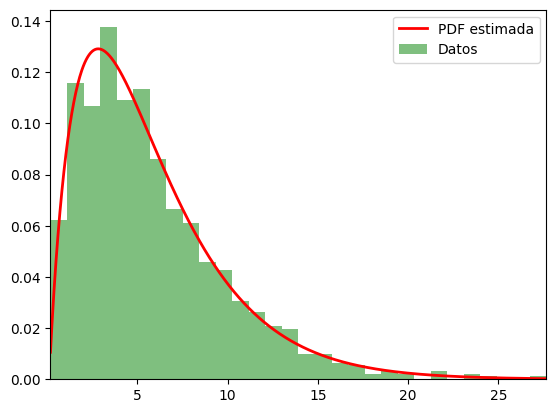

In [19]:

# Genera la CDF de la distribución gamma con los parámetros estimados
cdf_gamma_estimada = gamma.cdf(muestra, forma_est, loc_est, escala_est)

# Realiza la prueba K-S
resultado_ks = kstest(muestra, 'gamma', args=(forma_est, loc_est, escala_est))

print("Estadístico de prueba K-S: ", resultado_ks.statistic)
print("Valor p de la prueba K-S: ", resultado_ks.pvalue)
# Crear un histograma de los datos
plt.hist(muestra, bins=30, density=True, alpha=0.5, color='g')

# Generar valores para el eje x
x = np.linspace(min(muestra), max(muestra), 1000)

# Calcular la PDF con los parámetros estimados
pdf = gamma.pdf(x, forma_est, loc_est, escala_est)

# Graficar la PDF
plt.plot(x, pdf, 'r-', lw=2)
plt.xlim(min(muestra), max(muestra))
# Agregar una leyenda
plt.legend(['PDF estimada', 'Datos'])

# Mostrar el gráfico
plt.show()

### 6.3 Evaluacion 

Observando la prueba de Kolmogorov-Smirnov podemos observar que el valor de p es de 0.99 y el estadistico de prueba es de 0.012. lo que nos indica que los datos son bastante similares, por lo tanto podemos decir que el metodo de MLE es bastante bueno para estimar parametros.

## Ejercicio 7 - Distribuciones Multivariable

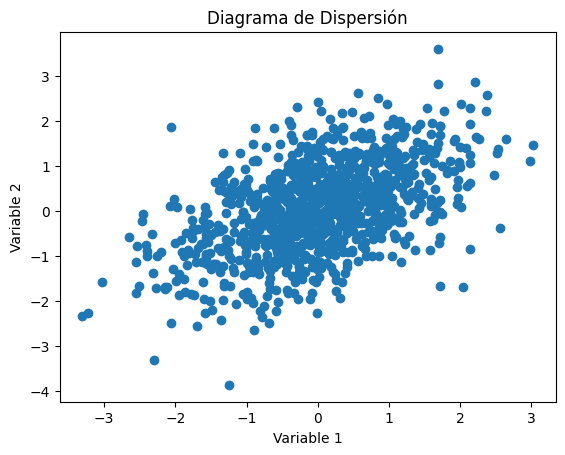

In [27]:
# Parámetros de la distribución normal bivariada
mu = np.array([0, 0])
cov = np.array([[1, 0.5], [0.5, 1]])

# Generar muestra aleatoria
np.random.seed(12345)  # Puedes usar cualquier número aquí
muestra = np.random.multivariate_normal(mu, cov, 1000)

# 7.1 Visualizar los puntos de datos
plt.scatter(muestra[:,0], muestra[:,1])
plt.title('Diagrama de Dispersión')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.show()

### 7.2 Calcular el coeficiente de correlacion

In [28]:

coef_correlacion = np.corrcoef(muestra[:,0], muestra[:,1])
print("Coeficiente de correlación: \n", coef_correlacion)

Coeficiente de correlación: 
 [[1.         0.51780462]
 [0.51780462 1.        ]]


### 7.3 Info sobre las relaciones entre variables

El coeficiente de correlación que se obtuvo es aproximadamente 0.52, lo cual indica una correlación positiva moderada entre las dos variables. Esto significa que cuando una variable aumenta, la otra también tiende a aumentar, pero no perfectamente.

En términos del diagrama de dispersión, se pueden observar los datos algo dispersos pero con una tendencia positiva, lo cual esta indicando esta correlación positiva. Sin embargo, dada la moderada correlación, la agrupación de puntos no es tan estricta por lo que hay una cantidad significativa de variabilidad o "dispersión" de los puntos alrededor de la línea.

## Ejercicio 8 - Goodnes-0f-Fit Test

### 8.1 Realizar prueba de bondad de ajuste

In [36]:
import numpy as np
from scipy import stats

# Generar muestra aleatoria de 500 puntos a partir de una distribución uniforme
np.random.seed(12345)  # Puedes usar cualquier número aquí
muestra = np.random.uniform(0, 1, 500)

# 8.1 Realizar prueba de bondad de ajuste
# Crear histograma para obtener las frecuencias observadas
frec_obs, bins = np.histogram(muestra, bins=10, density=False)
frec_obs = frec_obs / np.sum(frec_obs)  # normalizar las frecuencias observadas

# Calcular las frecuencias esperadas para una distribución uniforme
frec_esp = np.array([1/10]*10)  # para una distribución uniforme, esperamos que cada intervalo tenga aproximadamente la misma frecuencia

# Realizar la prueba de chi-cuadrado
chi2, p_value = chisquare(frec_obs, frec_esp)

print("Estadística chi-cuadrado: ", chi2)
print("Valor p: ", p_value)


Estadística chi-cuadrado:  0.01296
Valor p:  0.9999999999973027


### 8.3 Interpretar el resultado de la prueba
La prueba de bondad de ajuste de chi-cuadrado ha resultado en una estadística de chi-cuadrado de aproximadamente 0.01296 y un valor p muy cercano a 1 (0.9999999999973027).

Un valor p tan alto indica que no podemos rechazar la hipótesis nula de que los datos observados siguen una distribución uniforme. Es decir, los datos parecen seguir una distribución uniforme con base en esta prueba.

### 8.3 Modificacion para mejorar la bondad de ajuste

Dado que los datos que se generaron provienen de una distribución uniforme y la prueba de bondad de ajuste de chi-cuadrado confirma que siguen una distribución uniforme, no debería ser necesario modificar nada para mejorar la bondad de ajuste. Sin embargo, es importante recordar que las pruebas de bondad de ajuste dependen del tamaño de la muestra y de la aleatoriedad inherente en los datos. En algunos casos, puedes obtener resultados diferentes simplemente debido a la variabilidad de los datos aleatorios.

Si se quiere mejorar aún más la precisión de los resultados, se podria considerar aumentar el tamaño de la muestra. Además, podrías explorar pruebas de bondad de ajuste más robustas o adecuadas para los datos.